In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np 
from bokeh.plotting import show, figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("Family_Income_and_Expenditure.csv") 

In [3]:
# spliting data in numeric and text
colnumber = len(data.columns)
data_number = pd.DataFrame()
data_text = pd.DataFrame()
for i in range(colnumber):
    if data.dtypes[i] == "int64":
        data_number[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])
    else:
        data_text[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])

# 3. Model 2 - RandomForestRegressor

## 3.1. Model only with numeric data

### without scaled data

In [48]:
data_number_a = pd.get_dummies(data_number, columns=["Agricultural Household indicator"])

In [49]:
np.random.seed(42)
mask = np.random.rand(data_number_a.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_number_a[mask].shape, data_number_a[~mask].shape))

Train set shape (29197, 47), test set shape (12347, 47)


In [50]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_number_a[mask].drop(["Total Household Income"], axis=1),
       data_number_a[mask]["Total Household Income"])
pred = rf.predict(data_number_a[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((pred - data_number_a[~mask]["Total Household Income"])**2))))

RMSE = 150921.28


In [51]:
rf.feature_importances_

array([4.25321243e-02, 4.20824660e-03, 4.24580385e-03, 5.41078207e-03,
       5.27379748e-03, 5.12259340e-03, 4.56234640e-03, 7.03592844e-03,
       2.91795663e-03, 1.83443149e-03, 1.26375926e-02, 1.49418336e-01,
       5.42303263e-03, 1.01055386e-02, 2.05248769e-02, 9.83260680e-02,
       6.98471611e-03, 3.35251953e-01, 1.06993919e-02, 3.07188671e-03,
       2.19239876e-01, 6.41155388e-03, 1.91912246e-03, 1.13689319e-03,
       9.97093962e-04, 3.57226275e-03, 3.33221608e-03, 3.84890967e-03,
       2.35644567e-03, 3.30427907e-05, 1.52913267e-03, 9.86725257e-04,
       8.82962521e-04, 1.01097490e-03, 4.14341651e-04, 3.36366301e-03,
       5.11631205e-03, 4.25433293e-04, 2.69342001e-03, 2.21830435e-03,
       1.25096719e-03, 1.31806195e-04, 1.04107480e-03, 2.22198694e-04,
       6.59134489e-05, 2.11950971e-04])

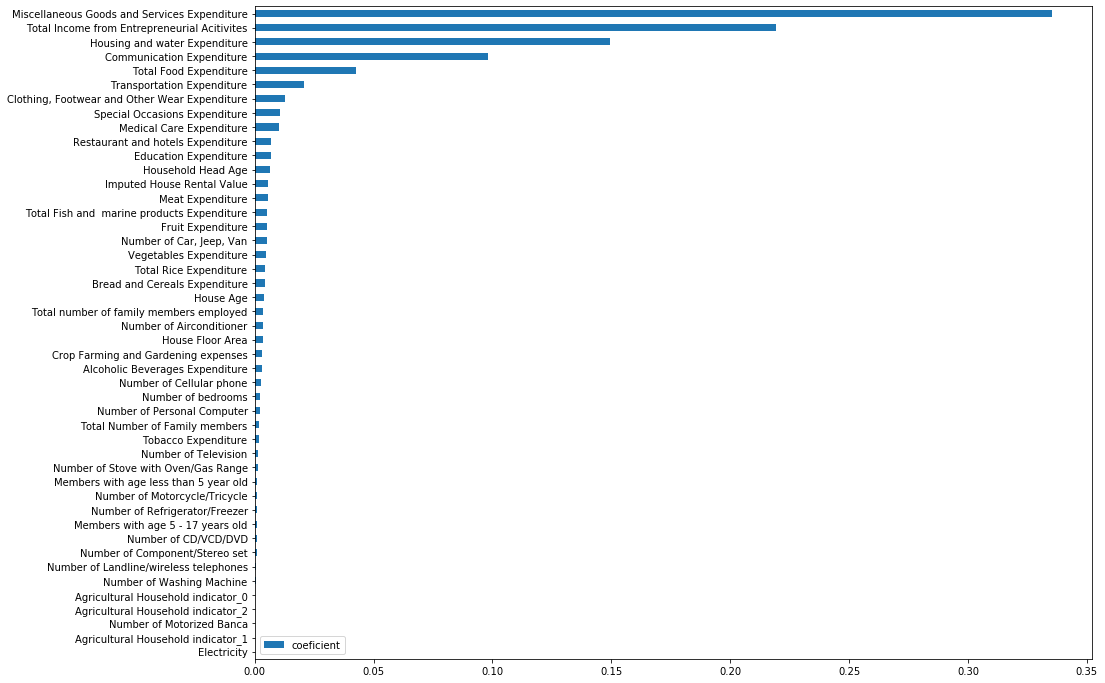

In [52]:
variable_importance = pd.DataFrame(rf.feature_importances_, columns=['coeficient'], index = data_number_a[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))

### with scaled data 

In [53]:
data_number_a = pd.get_dummies(data_number, columns=["Agricultural Household indicator"])

In [54]:
np.random.seed(42)
mask = np.random.rand(data_number_a.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_number_a[mask].shape, data_number_a[~mask].shape))

Train set shape (29197, 47), test set shape (12347, 47)


In [55]:
mean = data_number_a[mask].mean()
std = data_number_a[mask].std()
# Standard scaler
data_number_a_scaled = (data_number_a - mean) / std

In [56]:
rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
pred = rf.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))))

RMSE = 0.5360


In [57]:
score = rf.score(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
                 data_number_a_scaled[mask]["Total Household Income"])
print('R^2 = {0:.04f}'.format(score))

R^2 = 0.9800


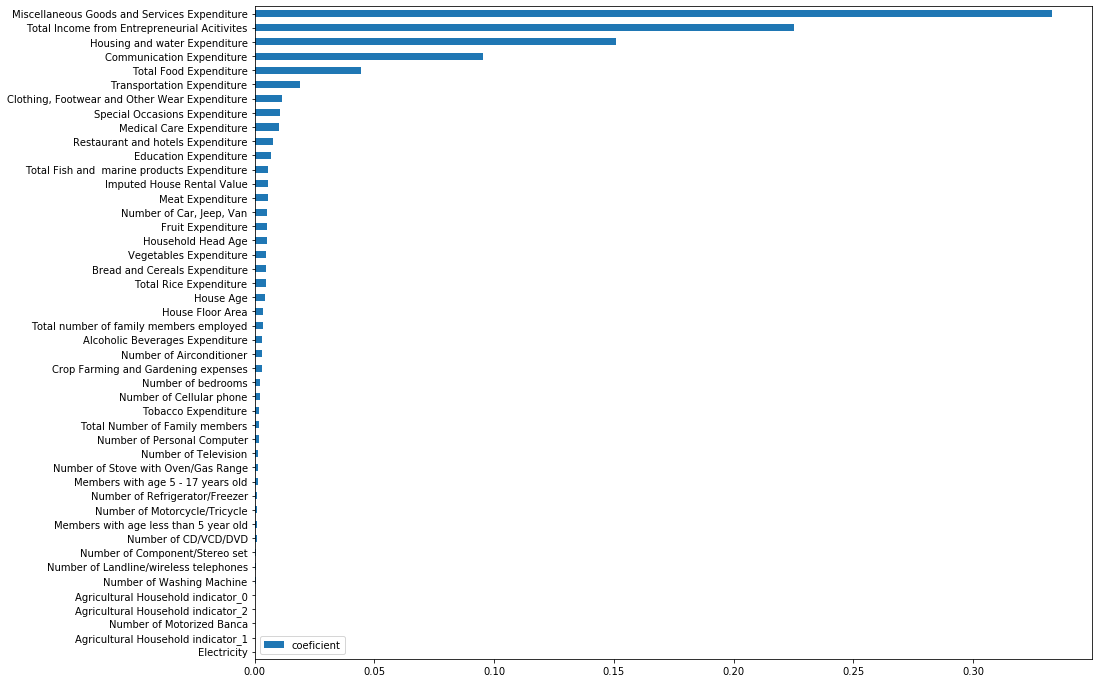

In [58]:
variable_importance = pd.DataFrame(rf.feature_importances_, columns=['coeficient'], index = data_number_a[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))

Random Forest get RMSE = 0.5360.

Linear Regresion model get RMSE = 0.5495.

### finding better model parameters

#### n_estimator

In [61]:
results = []
n_estimator_options = [30, 40, 50, 60, 100, 200, 500]

for trees in n_estimator_options:
    rf = RandomForestRegressor(n_estimators = trees, random_state = 42)
    rf.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
    print(trees, "trees")
    pred = rf.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
    RMSE = np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))
    print('RMSE = {0:.04f}'.format(RMSE))
    results.append(RMSE)

30 trees
RMSE = 0.5412
40 trees
RMSE = 0.5369
50 trees
RMSE = 0.5329
60 trees
RMSE = 0.5329
100 trees
RMSE = 0.5360
200 trees
RMSE = 0.5343
500 trees
RMSE = 0.5339


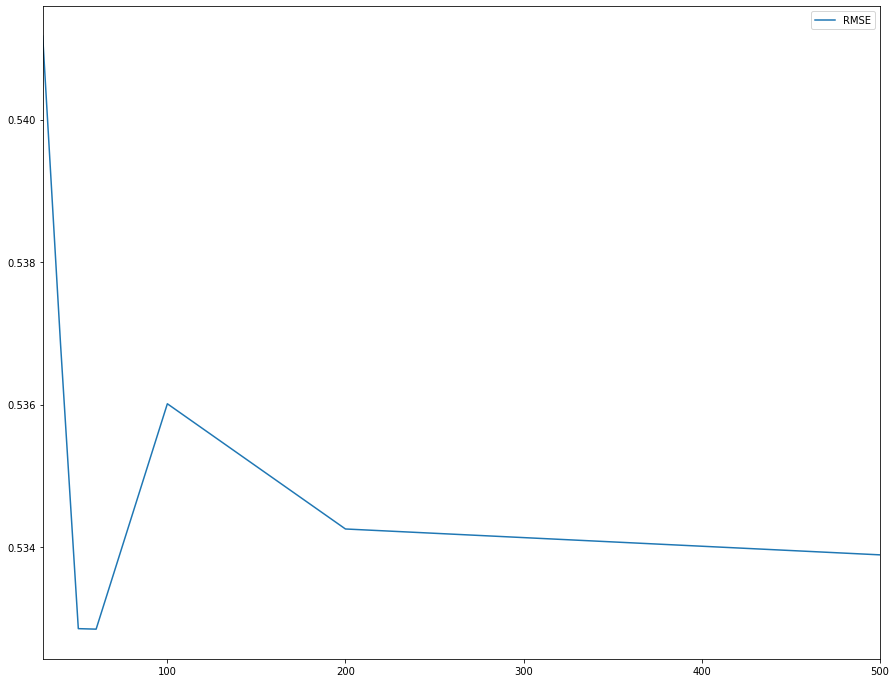

In [62]:
pd.DataFrame(results, n_estimator_options, columns=['RMSE']).plot(kind='line', figsize=(15,12))

Best n_estimator parameter is 50.

In [63]:
rf = RandomForestRegressor(n_estimators=50, random_state = 42)
rf.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
pred = rf.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))))

RMSE = 0.5329


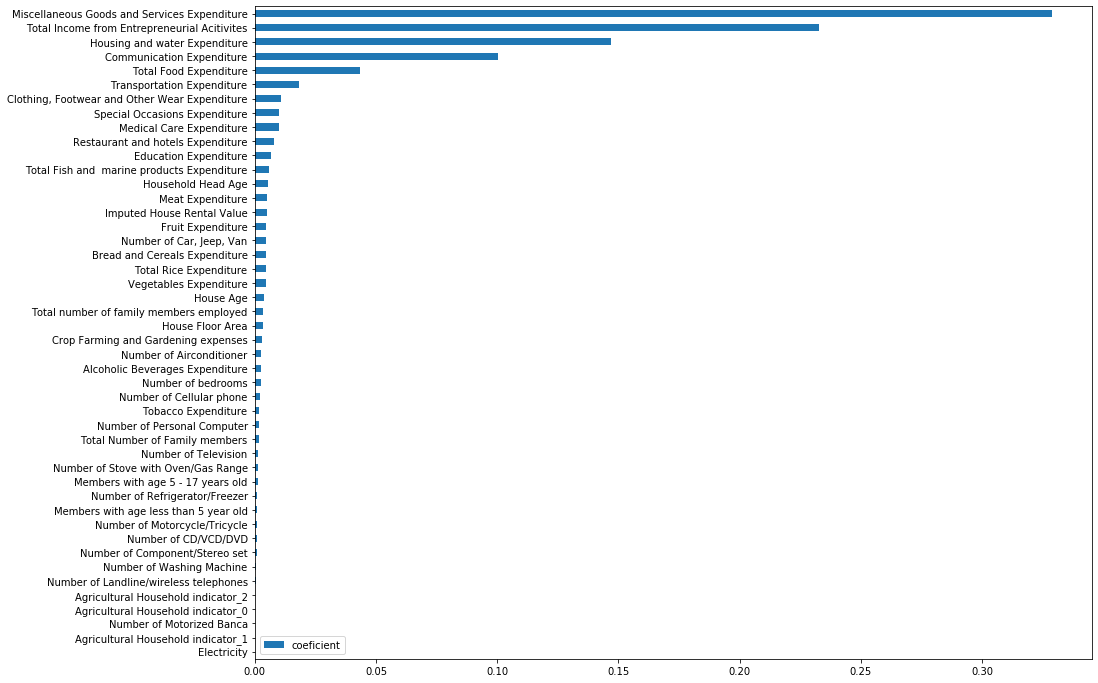

In [64]:
variable_importance = pd.DataFrame(rf.feature_importances_, columns=['coeficient'], index = data_number_a[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))

In [68]:
score = rf.score(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
                 data_number_a_scaled[mask]["Total Household Income"])
print('R^2 = {0:.04f}'.format(score))

R^2 = 0.9780


## 3.2. Model only all data

In [11]:
data_text_recode = pd.get_dummies(data_text)

In [12]:
data_number_a = pd.get_dummies(data_number, columns=["Agricultural Household indicator"])

In [13]:
data_total = pd.DataFrame()
data_total = pd.concat([data_number_a, data_text_recode], axis = 1)

In [14]:
data_total.head(3)

,Total Household Income,Total Food Expenditure,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,Alcoholic Beverages Expenditure,...,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc"
0,480332,117848,42140,38300,24676,16806,3325,13460,3000,0,...,0,0,1,0,0,0,0,0,0,0
1,198235,67766,17329,13008,17434,11073,2035,7833,2360,960,...,0,0,1,0,0,0,0,0,0,0
2,82785,61609,34182,32001,7783,2590,1730,3795,4545,270,...,0,0,0,0,0,0,1,0,0,0


In [15]:
# split numeric data in train and test sets
np.random.seed(42)
mask = np.random.rand(data_total.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_total[mask].shape, data_total[~mask].shape))

Train set shape (29197, 557), test set shape (12347, 557)


In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state = 42)
rf.fit(data_total[mask].drop(["Total Household Income"], axis=1),
       data_total[mask]["Total Household Income"])
pred = rf.predict(data_total[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - data_total[~mask]["Total Household Income"])**2))))

RMSE = 151318.6817


In [104]:
rf = RandomForestRegressor(n_estimators=50, random_state = 42)
rf.fit(data_total[mask].drop(["Total Household Income"], axis=1),
       data_total[mask]["Total Household Income"])
pred = rf.predict(data_total[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - data_total[~mask]["Total Household Income"])**2))))

RMSE = 151142.0574


In [119]:
variable_importance = pd.DataFrame(rf.feature_importances_, columns=['coeficient'], index = data_total[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"], ascending = 0).head(40)
#.plot(kind='barh', figsize=(15,20))

,coeficient
Miscellaneous Goods and Services Expenditure,0.327769
Total Income from Entrepreneurial Acitivites,0.232278
Housing and water Expenditure,0.146253
Communication Expenditure,0.099016
Total Food Expenditure,0.042420
Transportation Expenditure,0.017613
"Clothing, Footwear and Other Wear Expenditure",0.009620
Medical Care Expenditure,0.009239
Special Occasions Expenditure,0.008988
Restaurant and hotels Expenditure,0.005709


Numeric data have stronger influence than text data in model.

# 4. Model 3 - GradientBoostingRegressor

In [76]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42, loss='ls')
gb.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
pred = gb.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))))

RMSE = 0.5353


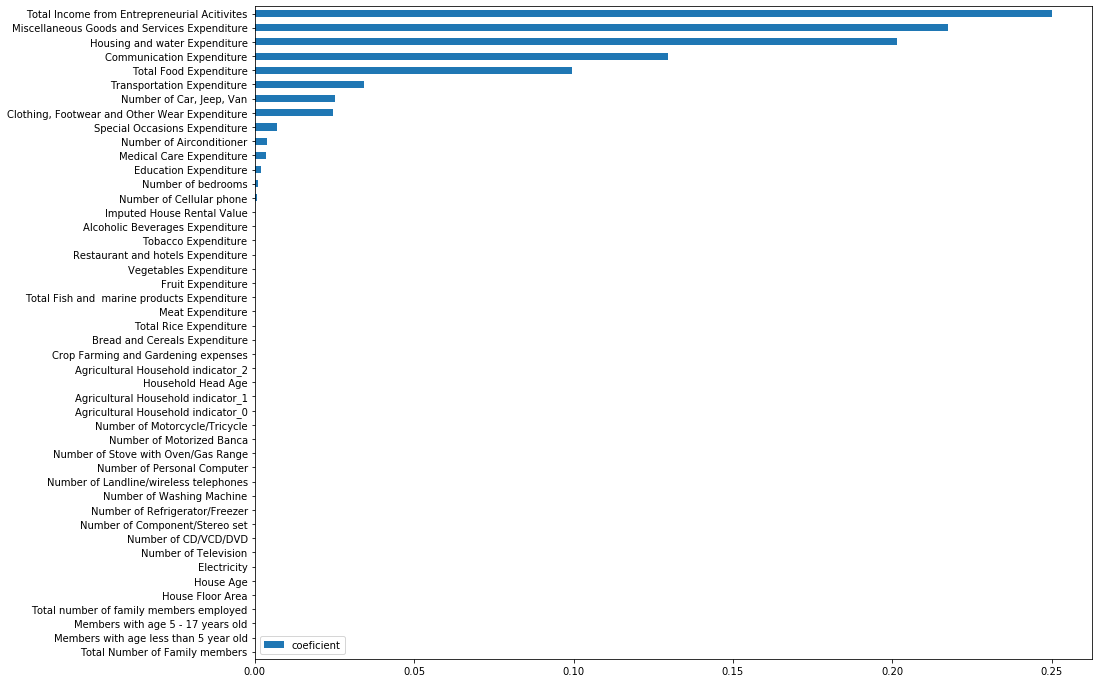

In [71]:
variable_importance = pd.DataFrame(gb.feature_importances_, columns=['coeficient'], index = data_number_a[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))

RMSE = 0.5353

Finding better parameters

In [78]:
results = []
n_estimator_options = [50, 100, 400, 500, 600, 1000]

for trees in n_estimator_options:
    gb = GradientBoostingRegressor(n_estimators=trees, learning_rate=0.1, random_state=42, loss='ls')
    gb.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
    print(trees, "trees")
    pred = gb.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
    RMSE = np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))
    print('RMSE = {0:.04f}'.format(RMSE))
    results.append(RMSE)

50 trees
RMSE = 0.5429
100 trees
RMSE = 0.5353
400 trees
RMSE = 0.5346
500 trees
RMSE = 0.5340
600 trees
RMSE = 0.5356
1000 trees
RMSE = 0.5381


In [81]:
results = []
n_estimator_options = [20, 50, 60, 70, 80, 100]

for trees in n_estimator_options:
    gb = GradientBoostingRegressor(n_estimators=trees, learning_rate=0.2, random_state=42, loss='ls')
    gb.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
    print(trees, "trees")
    pred = gb.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
    RMSE = np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))
    print('RMSE = {0:.04f}'.format(RMSE))
    results.append(RMSE)

20 trees
RMSE = 0.5503
50 trees
RMSE = 0.5351
60 trees
RMSE = 0.5339
70 trees
RMSE = 0.5343
80 trees
RMSE = 0.5348
100 trees
RMSE = 0.5369


Best n_estimators = 60 tress, learning_rate = 0.2 => RMSE = 0.5339

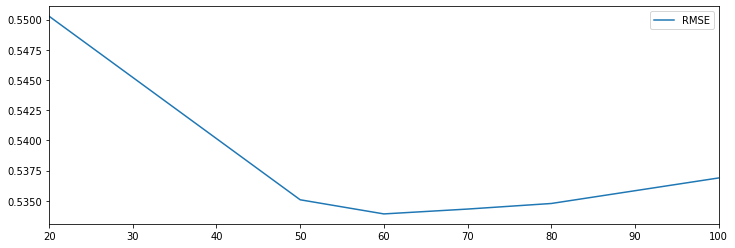

In [82]:
pd.DataFrame(results, n_estimator_options, columns=['RMSE']).plot(kind='line', figsize=(12,4))

In [83]:
gb = GradientBoostingRegressor(n_estimators=60, learning_rate=0.2, random_state=42, loss='ls')
gb.fit(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
       data_number_a_scaled[mask]["Total Household Income"])
pred = gb.predict(data_number_a_scaled[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((pred - data_number_a_scaled[~mask]["Total Household Income"])**2))))

RMSE = 0.5339


In [87]:
score = gb.score(data_number_a_scaled[mask].drop(["Total Household Income"], axis=1),
                 data_number_a_scaled[mask]["Total Household Income"])
print('R^2 = {0:.04f}'.format(score))

R^2 = 0.9102


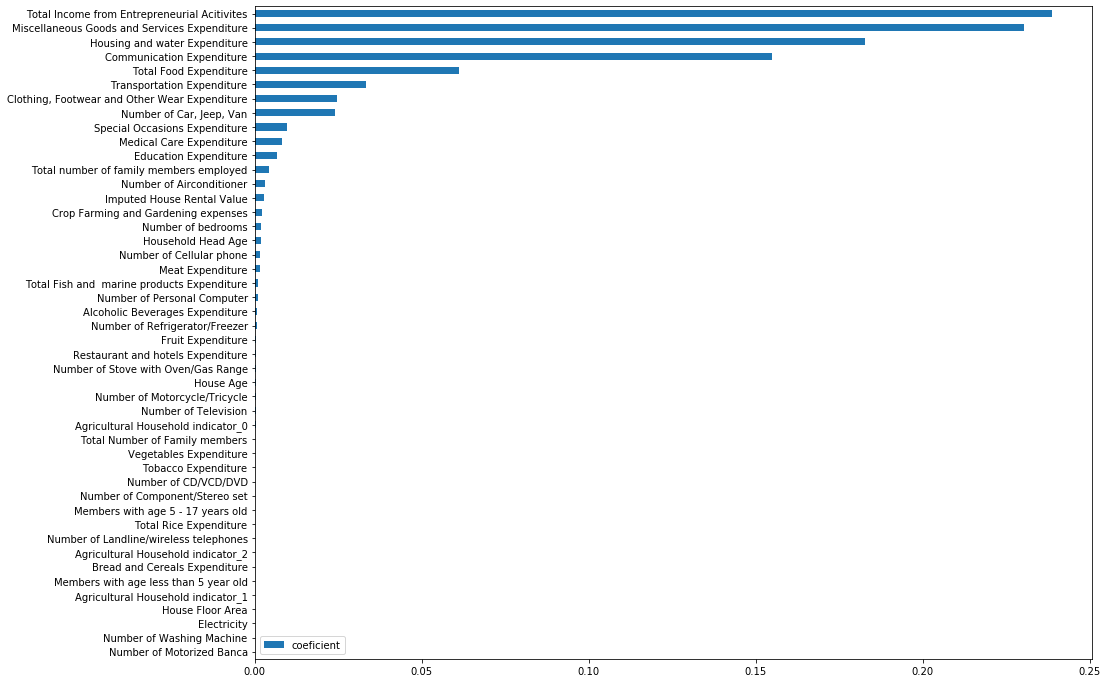

In [84]:
variable_importance = pd.DataFrame(gb.feature_importances_, columns=['coeficient'], index = data_number_a[mask].drop(["Total Household Income"], axis = 1).columns)
variable_importance.sort_values(by = ["coeficient"]).plot(kind='barh', figsize=(15,12))